# Comcast Telecom Consumer Complaints
---
 -- Gaurav Vatsa, Cohort VI, vatsa.gaurav@gmail.com

In [1]:
import os

In [2]:
os.chdir (r"C:\Backup\Python\Datasets")

In [3]:
os.getcwd()

'C:\\Backup\\Python\\Datasets'

In [4]:
import numpy as np
import pandas as pd
from datetime import datetime

In [17]:
comcast = pd.read_csv("Comcast_telecom_complaints_data.csv")

In [18]:
comcast.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [19]:
comcast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
Ticket #                       2224 non-null object
Customer Complaint             2224 non-null object
Date                           2224 non-null object
Date_month_year                2224 non-null object
Time                           2224 non-null object
Received Via                   2224 non-null object
City                           2224 non-null object
State                          2224 non-null object
Zip code                       2224 non-null int64
Status                         2224 non-null object
Filing on Behalf of Someone    2224 non-null object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


https://stackabuse.com/how-to-format-dates-in-python/

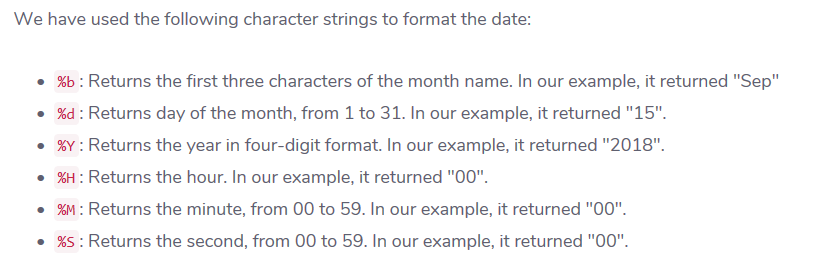

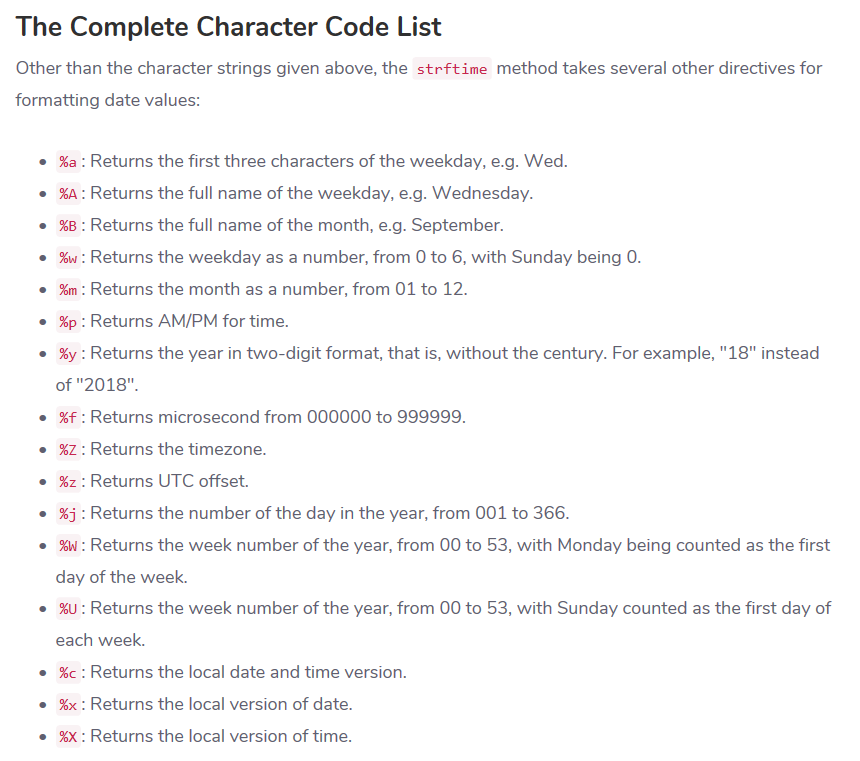

In [20]:
# Create a single col for Date Time by concatenating the two separate cols, converting the formats

comcast["DateTime"] = comcast.Date +" "+ comcast.Time
comcast["DateTime"] = pd.to_datetime(comcast["DateTime"], format ="%d-%m-%y %I:%M:%S %p")
comcast.drop(['Date_month_year','Time'],axis=1,inplace=True)
comcast["Date"] = pd.to_datetime(comcast["Date"], format="%d-%m-%y")
comcast.head()

,Ticket #,Customer Complaint,Date,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,DateTime
0,250635,Comcast Cable Internet Speeds,2015-04-22,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50
1,223441,Payment disappear - service got disconnected,2015-08-04,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56
2,242732,Speed and Service,2015-04-18,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-07-05,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35
4,307175,Comcast not working and no service to boot,2015-05-26,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26


In [21]:
comcast.dtypes

Ticket #                               object
Customer Complaint                     object
Date                           datetime64[ns]
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
DateTime                       datetime64[ns]
dtype: object

Analysis Task
To perform these tasks, you can use any of the different Python libraries such as NumPy, SciPy, Pandas, scikit-learn, matplotlib, and BeautifulSoup.
- Import data into Python environment.
- Provide the trend chart for the number of complaints at monthly and daily granularity levels.
- Provide a table with the frequency of complaint types.

In [32]:
# Figuring out the month and assigning that to a df. 
comcast["M"] = pd.DatetimeIndex(comcast["DateTime"]).month
df1 = comcast.groupby("M").count()[["Ticket #"]] # Use groupby to sum the no. of complaints by Month "M"
df1.reset_index(inplace = True)
df1

,M,Ticket #
0,1,55
1,2,59
2,3,45
3,4,375
4,5,317
5,6,1046
6,7,49
7,8,67
8,9,55
9,10,53


In [27]:
df2 = comcast.groupby("Date").count()[["Ticket #"]]
df2.reset_index(inplace = True)
df2.tail(20)

,Date,Ticket #
71,2015-06-29,51
72,2015-06-30,53
73,2015-07-04,25
74,2015-07-05,15
75,2015-07-06,9
76,2015-08-04,28
77,2015-08-05,15
78,2015-08-06,24
79,2015-09-04,21
80,2015-09-05,11


In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 2 columns):
Date        91 non-null datetime64[ns]
Ticket #    91 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.5 KB


In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

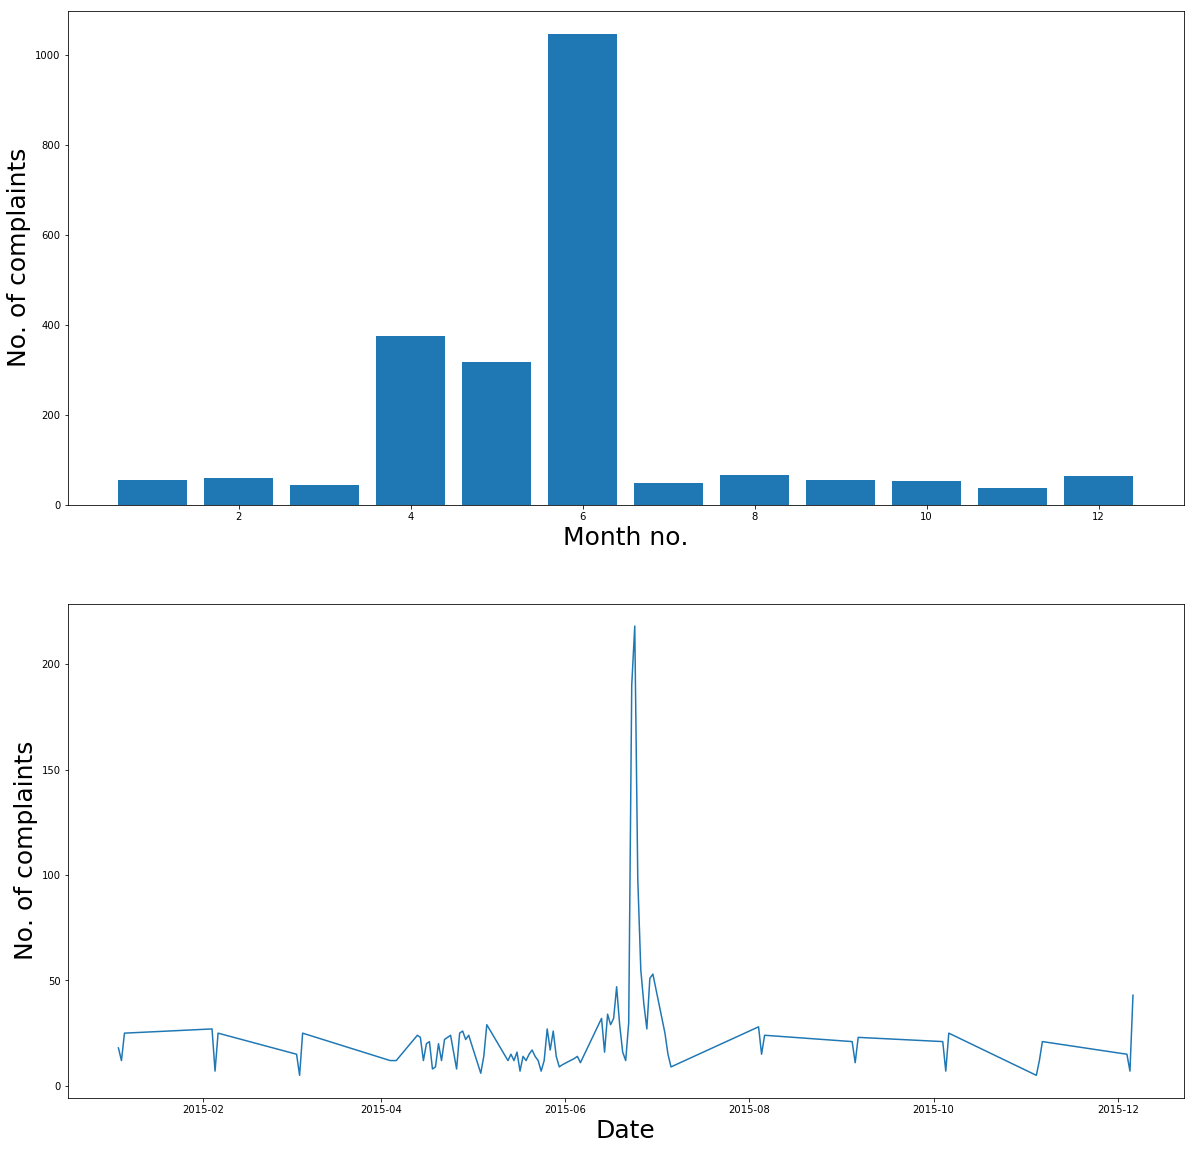

In [30]:
# Using subplots

x1 = df1["M"]
y1 = df1["Ticket #"]
x2 = df2["Date"]
y2 = df2["Ticket #"]

plt.figure()
f, axes = plt.subplots(2,1, figsize = (20,20))
axes[0].bar(df1['M'],df1['Ticket #'])
axes[0].set_xlabel('Month no.', fontsize=25)
axes[0].set_ylabel('No. of complaints', fontsize=25)

axes[1].plot(df2['Date'],df2['Ticket #'])
axes[1].set_xlabel('Date', fontsize=25)
axes[1].set_ylabel('No. of complaints',fontsize=25)

plt.show()

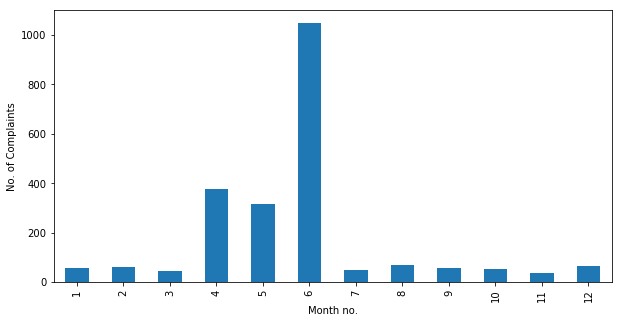

In [31]:
# Another way --
plt.figure(figsize=[10,5]) # In inches
comcast.groupby("M").count()["Ticket #"].plot(kind = "bar")
plt.ylabel("No. of Complaints")
plt.xlabel("Month no.")
plt.show()

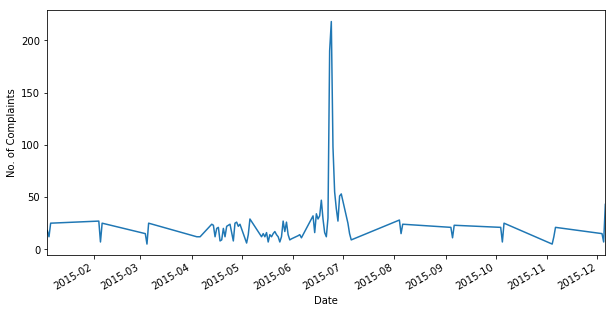

In [33]:
plt.figure(figsize=[10,5]) # In inches
comcast.groupby("Date").count()["Ticket #"].plot(kind = "line")
plt.ylabel("No. of Complaints")
plt.show()

Ans - As observed in the above charts -- 
The volume of complaints spiked in the month of June 2015, particularly between the day no. 170 to 180 in the year, thats the last week of June 2015.

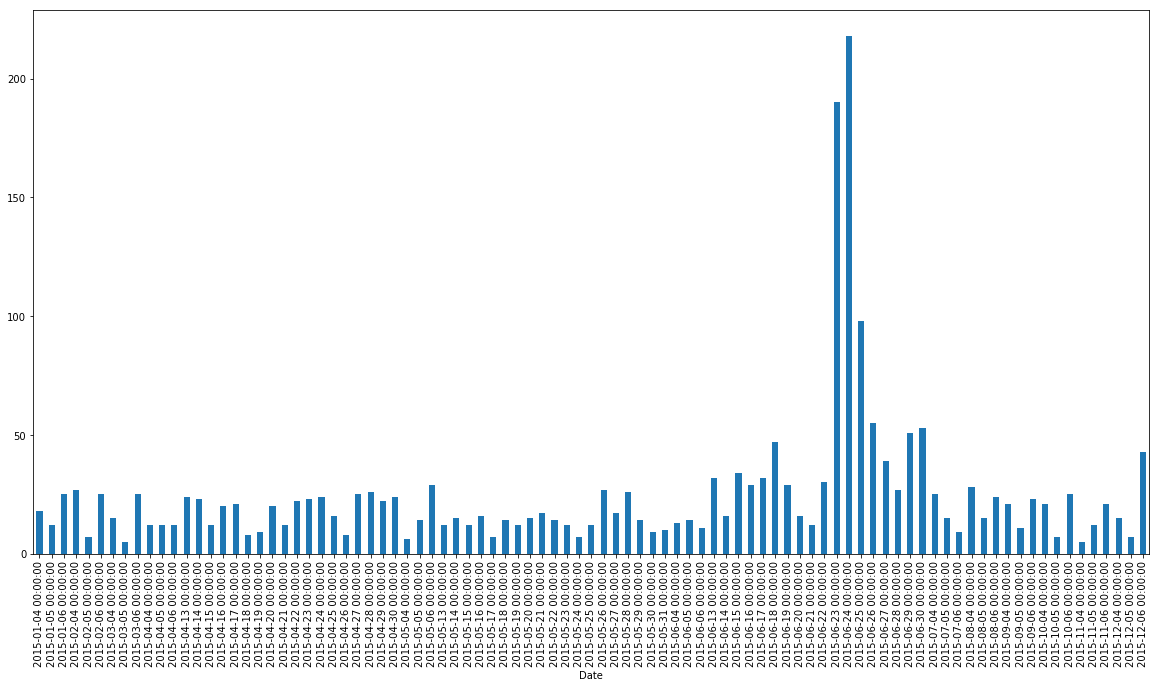

In [34]:
# Using bar chart for more granularity
plt.figure(figsize=[20,10])
comcast.groupby("Date").count()["Ticket #"].plot(kind="bar")
plt.show()

Provide a table with the frequency of complaint types.

Check what are the types of complains?
Are there punctuations involved?
How do we handle the punctuations like -,:,;,... etc.

In [35]:
text = str(comcast["Customer Complaint"].values).lower()
text

"['comcast cable internet speeds'\n 'payment disappear - service got disconnected' 'speed and service' ...,\n 'complaint about comcast' 'extremely unsatisfied comcast customer'\n 'comcast, ypsilanti mi internet speed']"

In [36]:
import string

In [37]:
string.punctuation # Punctuations that Py can handle within a string

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [38]:
p = ""
for char in text:
    if char not in string.punctuation:
        p = p+char

In [39]:
p

'comcast cable internet speeds\n payment disappear  service got disconnected speed and service \n complaint about comcast extremely unsatisfied comcast customer\n comcast ypsilanti mi internet speed'

We can get a sense of complaint types by looking at a wordcloud

In [40]:
# !pip install wordcloud

In [41]:
from wordcloud import WordCloud, STOPWORDS
s = list(STOPWORDS) + ["comcast","got"]

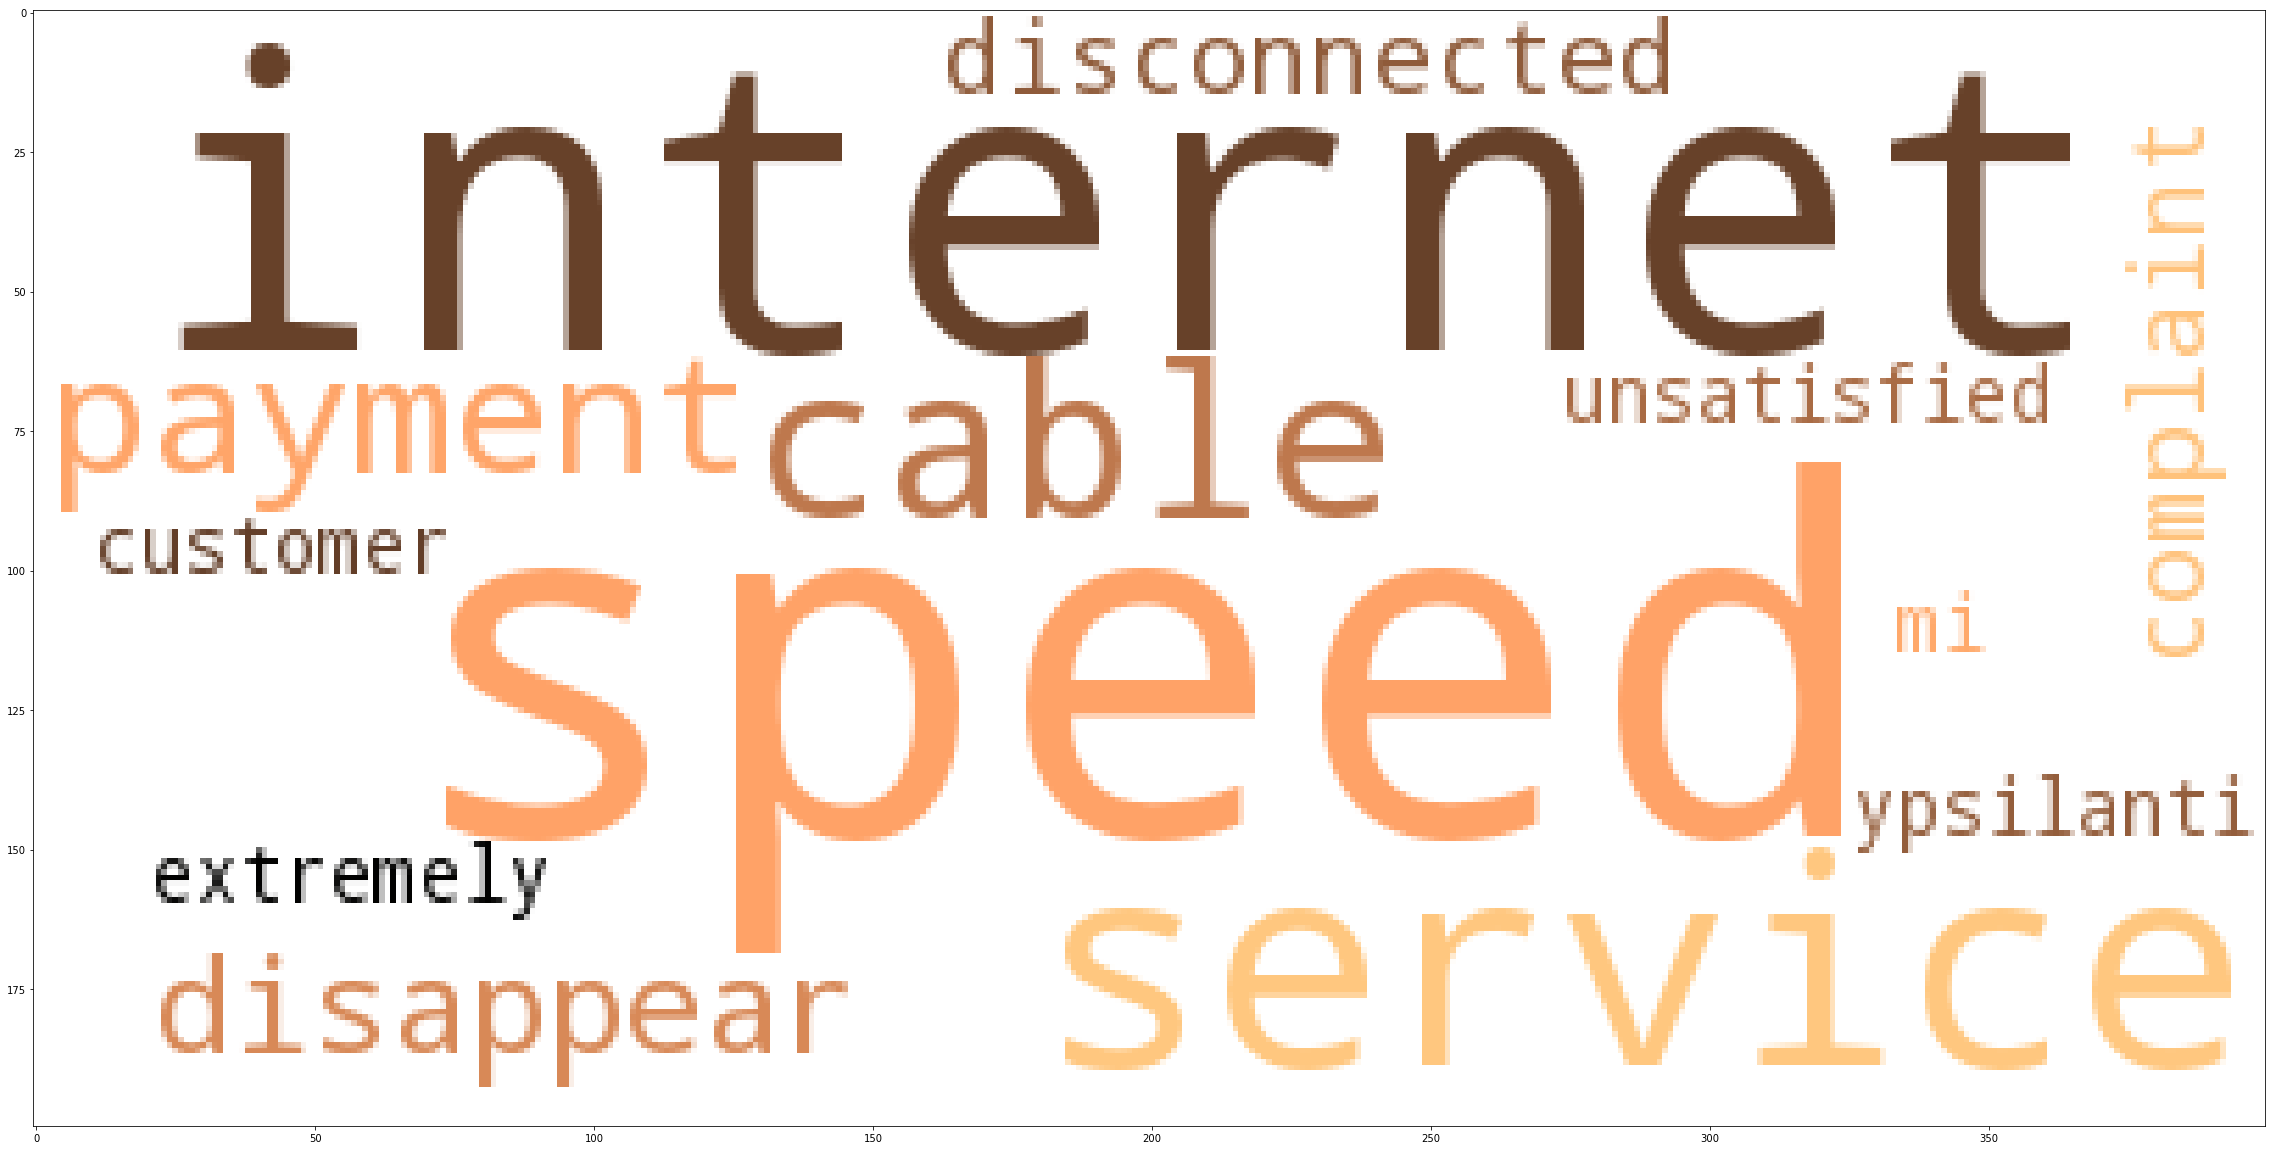

In [42]:
wordcloud = WordCloud(width = 400, height = 200, background_color = 'white', random_state=10,stopwords = s, 
                      max_words=50, normalize_plurals=True, prefer_horizontal=.9,
                      font_step=2, colormap="copper").generate(p)
fig = plt.figure(figsize = (40, 30))
   
plt.imshow(wordcloud)
plt.show()

Which complaint types are maximum i.e., around internet, network issues, or across any other domains.

In [43]:
# Import Reg expression library
import re

In [44]:
df3 = pd.DataFrame({"index": range(comcast.shape[0])})
df3[:3]

,index
0,0
1,1
2,2


In [45]:
comcast["Customer Complaint"] = comcast["Customer Complaint"].str.lower()

In [46]:
df3["speed"] = comcast["Customer Complaint"].str.extract("(speed)")
df3["internet"] = comcast["Customer Complaint"].str.extract("(internet)")
df3["service"] = comcast["Customer Complaint"].str.extract("(service)")
df3["cable"] = comcast["Customer Complaint"].str.extract("(cable)")
df3["payment"] = comcast["Customer Complaint"].str.extract("(payment)")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: currently extract(ex

In [47]:
df3.notnull().sum()

index       2224
speed        192
internet     532
service      489
cable         58
payment       13
dtype: int64

Ans - As we observe - The maximum number of complaints are related to internet and service
___

- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

       - Which state has the maximum complaints
       - Which state has the highest percentage of unresolved complaints

In [65]:
def status_new (row):
    if row["Status"] == "Closed" or row["Status"] == "Solved":
        return "Closed"
    elif row["Status"] == "Open" or row["Status"] == "Pending":
        return "Open"
    
comcast["New_Status"] = comcast.apply(lambda row: status_new (row), axis=1)
# Q. How do we insert this new column just after the old col index?? 
comcast.head()

,Ticket #,Customer Complaint,Date,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,DateTime,M,New_Status
0,250635,comcast cable internet speeds,2015-04-22,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,4,Closed
1,223441,payment disappear - service got disconnected,2015-08-04,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,8,Closed
2,242732,speed and service,2015-04-18,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,4,Closed
3,277946,comcast imposed a new usage cap of 300gb that ...,2015-07-05,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35,7,Open
4,307175,comcast not working and no service to boot,2015-05-26,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26,5,Closed


In [70]:
df4 = comcast.groupby(["State", "New_Status"]).count()[["Ticket #"]]
df4.head()

Ticket #
State    New_Status          
Alabama  Closed            17
         Open               9
Arizona  Closed            14
         Open               6
Arkansas Closed             6

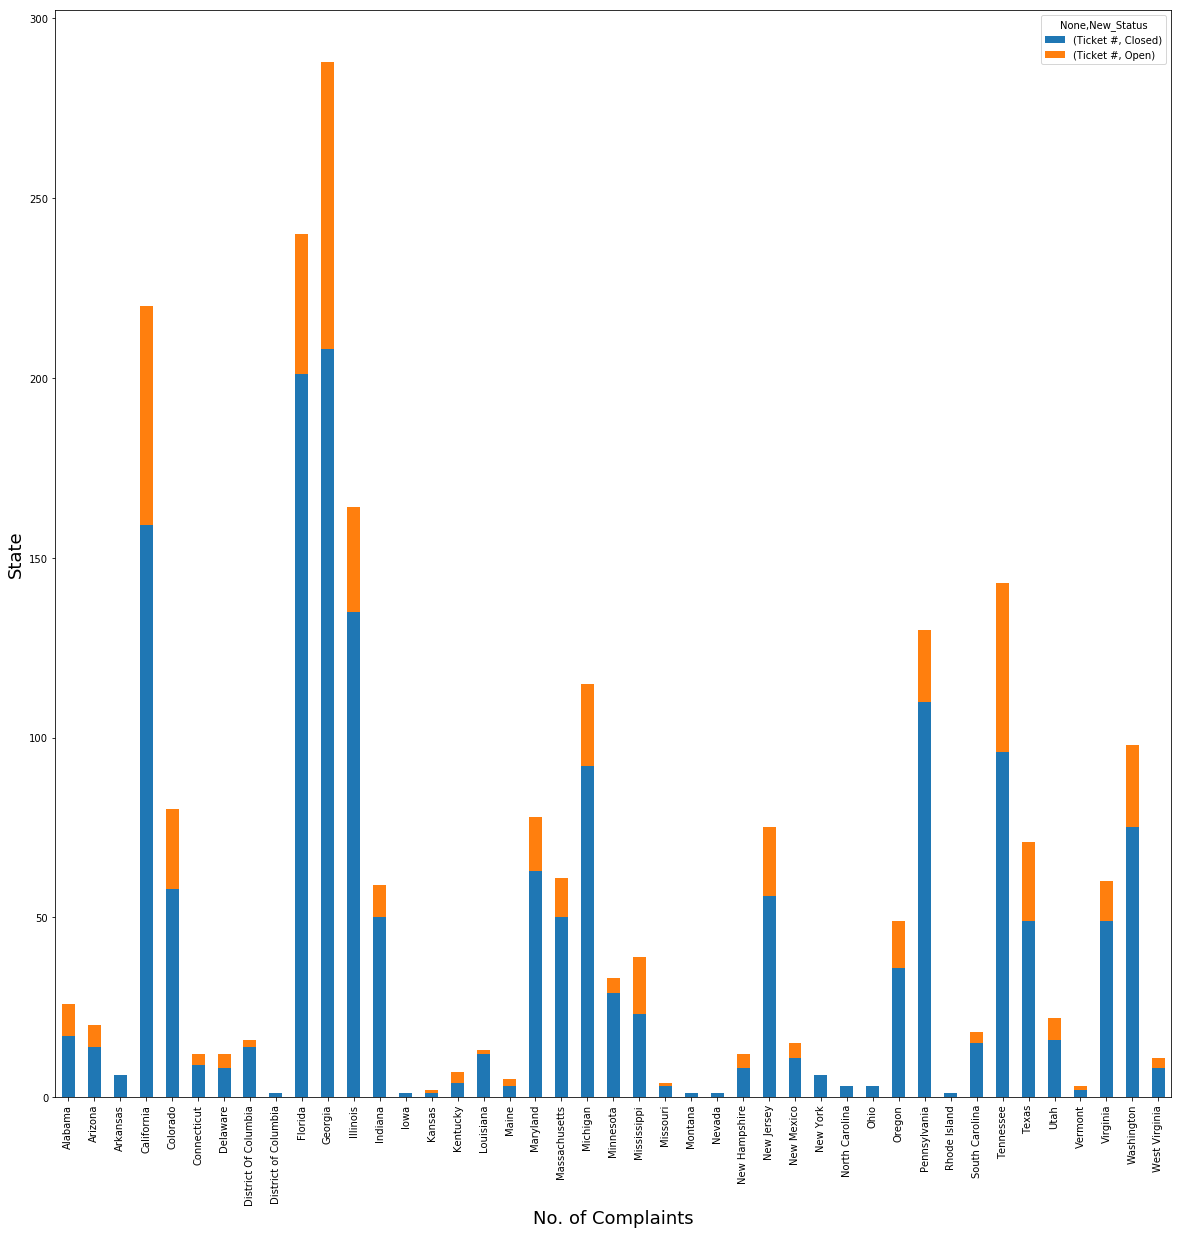

In [94]:
df4.unstack().plot(kind = "bar", stacked = True, figsize = (20,20))
plt.xlabel("No. of Complaints", fontsize = 18)
plt.ylabel("State", fontsize = 18)
plt.show()

In [95]:
pd.value_counts(comcast.New_Status,normalize = True)

Closed    0.767536
Open      0.232464
Name: New_Status, dtype: float64

In [108]:
df5 = pd.crosstab(comcast.State, comcast.New_Status, margins=True)
df5.sort_values("All", ascending = False)

New_Status,Closed,Open,All
State,,,
All,1707,517,2224
Georgia,208,80,288
Florida,201,39,240
California,159,61,220
Illinois,135,29,164
Tennessee,96,47,143
Pennsylvania,110,20,130
Michigan,92,23,115
Washington,75,23,98


Ans - We see that Georgia has the highest number of complaints

In [134]:
df5["Percent_open"] = df5.Open / df5.All
df5

New_Status,Closed,Open,All,Percent_open
State,,,,
Alabama,17,9,26,0.346154
Arizona,14,6,20,0.300000
Arkansas,6,0,6,0.000000
California,159,61,220,0.277273
Colorado,58,22,80,0.275000
Connecticut,9,3,12,0.250000
Delaware,8,4,12,0.333333
District Of Columbia,14,2,16,0.125000
District of Columbia,1,0,1,0.000000


In [135]:
df5.loc[df5["Percent_open"].idxmax()]

New_Status
Closed          1.0
Open            1.0
All             2.0
Percent_open    0.5
Name: Kansas, dtype: float64

Ans - As we see above Kansas state has the highest "percentage" of unresolved complaints, though the number of complaints are just 2

- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [136]:
df6 = comcast.groupby(["Received Via", "New_Status"]).count()["Ticket #"].unstack()
df6["Resolved%"] = df6.Closed / (df6.Closed + df6.Open)
df6

New_Status,Closed,Open,Resolved%
Received Via,,,
Customer Care Call,864,255,0.772118
Internet,843,262,0.762896


Ans - As observed, 77.21% of complaints received through Customer Care calls and 76.28% of complaints received though internet were resolved. 

-------- END -------